In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.pyplot import figure
import json
import pickle

In [3]:
# Read the News sentiment csv file into a pandas DataFrame
news_df = pd.read_csv('../resources/news/daily_sentiment_business_news_mock.csv')
news_df.head()

,date,sentiment_score,feature_2,feature_3,feature_4,feature_5
0,1/1/2019,-0.0625,-0.213947,0.274257,-0.462633,0.563726
1,1/2/2019,-0.0308,-0.373678,0.431631,-0.875021,0.904832
2,1/3/2019,0.0583,-0.644731,0.466891,-0.254485,0.664185
3,1/4/2019,0.0667,-0.160036,0.342783,-0.308019,0.398703
4,1/5/2019,0.1143,-0.118370,0.885121,-0.104226,0.704826


In [4]:
# Create a new dataframe with only the columns needed for the Regression
# clean_news_df = news_df.drop(['Unnamed: 0','magnitude_score'], axis=1).set_index('times')
clean_news_df = news_df.set_index('date')
# clean_news_df.index.names = ['date']
clean_news_df.index = pd.to_datetime(clean_news_df.index)
clean_news_df.head()

,sentiment_score,feature_2,feature_3,feature_4,feature_5
date,,,,,
2019-01-01,-0.0625,-0.213947,0.274257,-0.462633,0.563726
2019-01-02,-0.0308,-0.373678,0.431631,-0.875021,0.904832
2019-01-03,0.0583,-0.644731,0.466891,-0.254485,0.664185
2019-01-04,0.0667,-0.160036,0.342783,-0.308019,0.398703
2019-01-05,0.1143,-0.118370,0.885121,-0.104226,0.704826


In [5]:
# Read the VIX history csv file into a pandas DataFrame
vix_df = pd.read_csv('../resources/vix/vix_history.csv')
vix_df.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61


In [6]:
# Create a new dataframe with only the columns needed for the Regression
clean_vix_df = vix_df.drop(['VIX Open','VIX High','VIX Low'], axis=1).set_index('Date')
clean_vix_df.index.names = ['date']
clean_vix_df.rename(columns={'VIX Close': 'vix_close'}, inplace=True)
clean_vix_df.index = pd.to_datetime(clean_vix_df.index, format="%m/%d/%Y")
clean_vix_df.head()

,vix_close
date,
2004-01-02,18.22
2004-01-05,17.49
2004-01-06,16.73
2004-01-07,15.50
2004-01-08,15.61


In [7]:
clean_vix_df = clean_vix_df.pct_change()*100
clean_vix_df.head()

,vix_close
date,
2004-01-02,NaN
2004-01-05,-4.006586
2004-01-06,-4.345340
2004-01-07,-7.352062
2004-01-08,0.709677


In [8]:
# Merge the News Sentiment and VIX data
merged_df=pd.merge(clean_news_df,clean_vix_df, how='outer', left_index=True, right_index=True)
merged_df.head()

,sentiment_score,feature_2,feature_3,feature_4,feature_5,vix_close
date,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,NaN,NaN,NaN,NaN,NaN,-4.006586
2004-01-06,NaN,NaN,NaN,NaN,NaN,-4.345340
2004-01-07,NaN,NaN,NaN,NaN,NaN,-7.352062
2004-01-08,NaN,NaN,NaN,NaN,NaN,0.709677


In [9]:
# Drop rows with NaNs
merged_df.dropna(inplace=True)
merged_df

,sentiment_score,feature_2,feature_3,feature_4,feature_5,vix_close
date,,,,,,
2019-01-02,-0.0308,-0.373678,0.431631,-0.875021,0.904832,-8.654603
2019-01-03,0.0583,-0.644731,0.466891,-0.254485,0.664185,9.603790
2019-01-04,0.0667,-0.160036,0.342783,-0.308019,0.398703,-15.992141
2019-01-07,0.1933,-0.000593,0.870995,-0.150808,0.255888,0.093545
2019-01-08,0.1176,-0.142589,0.093281,-0.700056,0.171206,-4.345794
2019-01-09,-0.0583,-0.478396,0.730977,-0.582584,0.398348,-2.393747
2019-01-10,-0.2294,-0.820290,0.158711,-0.655529,0.917180,-2.402402
2019-01-11,0.0120,-0.564348,0.322784,-0.014584,0.657224,-6.717949
2019-01-14,0.0800,-0.389792,0.108762,-0.172280,0.249402,4.837823


In [10]:
# Export the data
merged_df.to_csv("../resources/vix/vix_sentiment.csv", index=False)
merged_df.to_json("../resources/vix/vix_sentiment.json", orient="table")

In [11]:
# Assign the data to X and y
X = merged_df[["sentiment_score", "feature_2","feature_3","feature_4","feature_5"]]
y = merged_df["vix_close"].values.reshape(-1, 1)
print(X.shape, y.shape)

print("Shape: ", X.shape, y.shape)

(41, 5) (41, 1)
Shape:  (41, 5) (41, 1)


In [12]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [13]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(training_score)
print(testing_score)

0.1816798956369784
0.054261422091144366


Text(0.5, 1.0, 'Residual Plot')

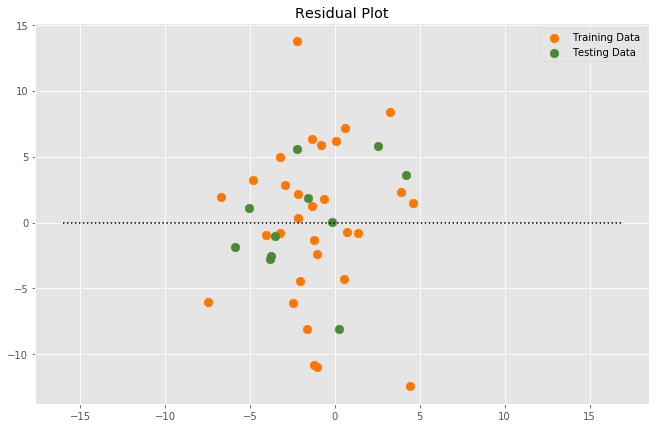

In [15]:
# Plot the Residuals for the Training and Testing data
plt.style.use('ggplot')
figure(num=None, figsize=(11, 7))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="#FF7700", label="Training Data", marker='o',s=75)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="#4B8937", label="Testing Data", marker='o',s=75)
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), colors="black",linestyles="dotted")
plt.title("Residual Plot")

In [16]:
# Try to make on a new prediction
new_value = np.array([[.22,.033,.01,.44,.33]])
y_pred = model.predict(new_value)
print(y_pred)

[[-0.91906126]]


In [19]:
# Save the mode
filename = '../resources/ml_model/lr_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [21]:
# Load model and make a prediction
model = pickle.load(open('../resources/ml_model/lr_model.pkl','rb'))
print(model.predict([[.02,.133,.11,.54,-.33]]))

[[4.75869003]]
